Let's consider a harmonic oscillator with weakly linear damping:
$$
x_1'' + \epsilon x_2+ \omega_0^2 x_1 = 0 \\ \tag{1.a}
$$
$$
x_2'' + \epsilon x_1+ \omega_0^2 x_2 = 0 \\ \tag{1.b}
$$
where $\epsilon = 0.01$ and $\omega_0 = 1$  

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import display, Markdown
# mpl.rc('text', usetex=True)
mpl.rc('font', family='Arial')
mpl.rc('font',size = 6)
mpl.rc('mathtext',fontset = 'stix')
mpl.rc('xtick', labelsize=3)
mpl.rc('ytick', labelsize=3)
mpl.rc('axes', labelsize=8)
mpl.rc('axes', labelpad=1)
mpl.rc('axes', titlesize=6)
mpl.rc('axes', linewidth=0.5)
mpl.rc('figure', figsize=(3.55/2.54, 5/2.54))
mpl.rc('figure', dpi=400)
mpl.rc('legend',frameon = False)
mpl.rc('savefig',pad_inches = 0.01)



cm_number = 34
cm = plt.cm.get_cmap("tab10")
colors = [
    ["#F9D5DD","#E3738B","#713948"],
    ["#DCE4FA","#8CA5EA","#495373"]
]
cm2 = plt.cm.get_cmap("Blues")
cm1 = plt.cm.get_cmap("Purples")
Colors = [[cm1(1. / (cm_number - 1) * i) for i in range(0, cm_number)],[cm2(1. / (cm_number - 1) * i) for i in range(0, cm_number)]]
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

Fs = 20
T = 2000
t = np.linspace(0,T,T*Fs)
omega0 = np.sqrt(2)
x0 = [2,1,2,0]
epsilon = 1e-2



C:\Users\TengMa\AppData\Local\Temp\ipykernel_31092\1945025435.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap("tab10")
C:\Users\TengMa\AppData\Local\Temp\ipykernel_31092\1945025435.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm2 = plt.cm.get_cmap("Blues")
C:\Users\TengMa\AppData\Local\Temp\ipykernel_31092\1945025435.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm1 = plt.cm.get_cmap("Purples")


# 1. Simulate data and visualization

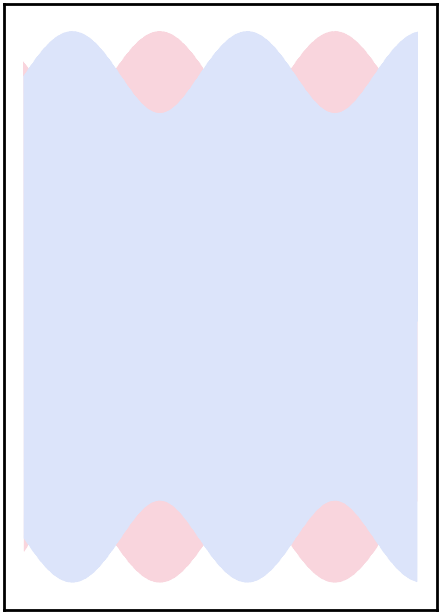

In [2]:
def WND(x,t):
    dxdt = [x[1], -omega0**2*x[0]-epsilon*x[2],x[3],-omega0**2*x[2]-epsilon*x[0]]
    return dxdt

WND_response = odeint(WND, y0 = x0,t = t)


length = len(WND_response[:,0])

fig,ax = plt.subplots()

ax.set_xticks([])
ax.set_yticks([])
ax.plot(t, WND_response[:,0], lw = 0.1,color = colors[0][0])
ax.plot(t, WND_response[:,2], lw = 0.1,color = colors[1][0])
# ax.set_xlim(0,100)

# plt.savefig("../../Fig/Example3-1.jpg",dpi = 300,transparent = True,bbox_inches="tight",pad_inches = 0.02)
# plt.show()

We try to find the governing equation $f$ from the Polynoimal library $\Phi(x)$: 

In [3]:
import sys
sys.path.append("../Model")
import Model
from itertools import combinations



library = [
    lambda x:x[0],
    lambda x:x[0]*x[0],
    lambda x:x[1],
    lambda x:x[1]*x[1],
    lambda x:x[2],
    lambda x:x[2]*x[2],
    lambda x:x[3],
    lambda x:x[3]*x[3],
    lambda x:x[0]*x[1],
    lambda x:x[0]*x[2],
    lambda x:x[0]*x[3],
    lambda x:x[1]*x[2],
    lambda x:x[1]*x[3],
    lambda x:x[2]*x[3],
]
library_name = [
    lambda x:x[0],
    lambda x:x[0]+x[0],
    lambda x:x[1],
    lambda x:x[1]+x[1],
    lambda x:x[2],
    lambda x:x[2]+x[2],
    lambda x:x[3],
    lambda x:x[3]+x[3],
    lambda x:x[0]+x[1],
    lambda x:x[0]+x[2],
    lambda x:x[0]+x[3],
    lambda x:x[1]+x[2],
    lambda x:x[1]+x[3],
    lambda x:x[2]+x[3],
]
dim = 2
model = Model.WeakNO(dim,library,library_name)

# 2. Calculate Evolution of weakly dynamic system

## Get main frequency $\omega_0$ by fft

In [4]:
model.Get_frequency(WND_response[:,[0,2]],t)
for i in range(model.dims):
    print("X_%d,Identifed result: %.4f"%(i,model.frequencys[i]))
    print("X_%d,Ground Truth: %.4f" %(i,omega0))

X_0,Identifed result: 1.4170
X_0,Ground Truth: 1.4142
X_1,Identifed result: 1.4170
X_1,Ground Truth: 1.4142


## Get evolutive amplitude $A$ and phase

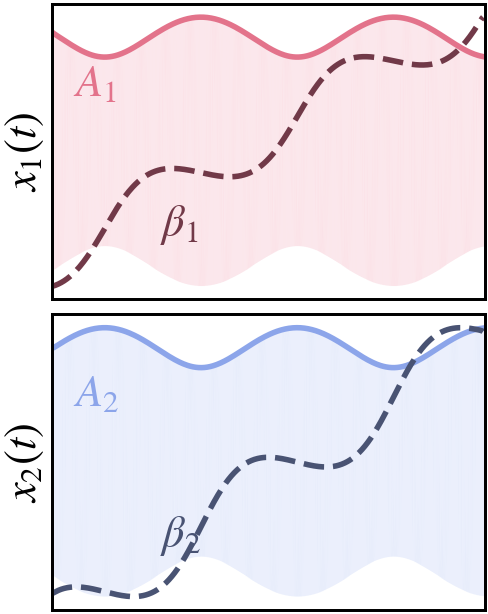

In [5]:
model.Get_Evolution(smooth_window = 1)
fig,axes = plt.subplots(2,1)
plt.subplots_adjust(hspace = 0.05)
for i in range(model.dims):
    ax = axes[i]

    ax.plot(t, WND_response[:,i*2],lw = 0.05,color = colors[i][0],label = "\epsilon = 1e-3")
    ax.plot(model.t_evolutions[:-1],model.evolutions[0,i,:-1], color = colors[i][1],lw = 1)
    ax.set_xlim(0,T)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylabel(r"$x_%d(t)$"%(i+1))
    ax.text(100,1,"$A_%d$"%(i+1), color = colors[i][1],fontsize = 8)
    ax.text(500,-1.5,r"$\beta_%d$"%(i+1), color = colors[i][2],fontsize = 8)

    
    ax2 = ax.twinx()
    ax2.plot(model.t_evolutions[:],np.radians(model.evolutions[1,i,:]), lw = 1,color = colors[i][2],ls = "--")
    ax2.set_xlim(0,T)

    ax2.set_yticks([])
plt.savefig("Fig/Example4-2.svg",dpi = 300,transparent = True,bbox_inches="tight")
plt.show()


## 3. Transfer library from derivative space to evolutive space

It's difficult to find $\epsilon f(x,x')$ by just solving Eq.$(4)$. So we proposed evolution library transferring method to discovery the governing equation of weakly nonlinear dynamics.

When $\epsilon=0$, the solution of Eq.$(1)$ can be written as:
$$
x = A \sin(\omega_0 t+\beta) = A\sin(\phi) \tag{2}
$$
where $A,\beta$ are constants.

When $\epsilon \neq 0$, the solution of Eq.$(1)$ can be still be expressed in the form Eq.$(4)$ provided that $A$ and $\beta$ are considered to be functions of $t$ rather than constants.

The *Method of Average* can be used to solve Eq.$(1)$. The governing equation of $A$ and $\beta$ can be expressed as Eq.$(5.a), (5.b)$. 

$$
\dot{A} = -\frac{\epsilon}{2\pi \omega_0}\int_0^{2\pi} \cos(\phi)f(x,x')d\phi \tag{3.a}
$$

$$
\dot{\beta} = \frac{\epsilon}{2A\pi \omega_0}\int_0^{2\pi} \sin(\phi)f(x,x')d\phi \tag{3.b}
$$
where $x=A\sin(\phi)$ and $\dot{x}=A\omega_0 cos(\phi)$

**Now, we build the relationship bewteen original library $\Phi(x,x')$ and evolution equation$\dot{A}$, $\dot{\beta}$.**


$$
\hat{\Phi}_A=-\frac{1}{2\pi\omega_0}\int_0^{2\pi} \cos(\phi)\Phi(x,x')d\phi \tag{6.a}
$$

$$
\hat{\Phi}_{\beta}=\frac{1}{2A\pi \omega_0}\int_0^{2\pi} \sin(\phi)\Phi(x,x')d\phi \tag{6.b}
$$

In [6]:
model.Library_rebuild()

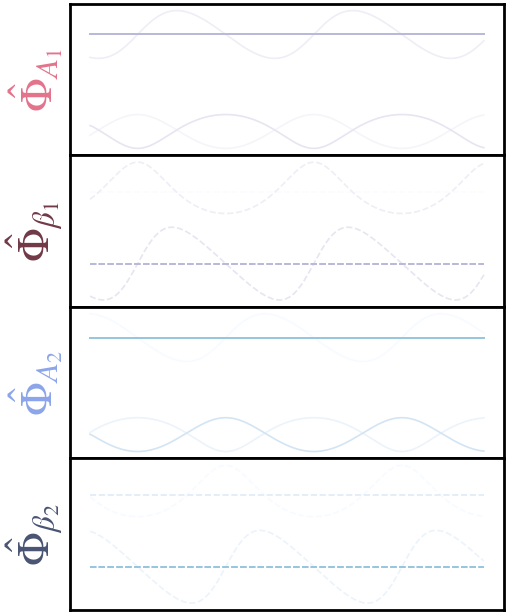

In [7]:
fig,axes = plt.subplots(4,1)
plt.subplots_adjust(hspace = 0)
Titles = [r"A",r"\beta"]
lss = ['-','--']
# ax2 = ax.twinx()
for d in range(model.dims):
    for i in range(2):
        ax = axes[2*d+i]
        for j in range(len(model.library)):
            if np.max(np.abs(model.Phi[:,i,j,d])):
                # c += 1
                ax.plot(model.t_evolutions[:], model.Phi[:,i,j,d], color = Colors[d][j], ls = lss[i], lw = 0.3)
        # ax2.plot(model.t_evolutions, model.Phi[:,1,j,0], color = Colors[1][j+4], ls = '--', lw = 0.7)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_ylabel(r"$\hat{\Phi}_{%s_%d}$"%(Titles[i],d+1),color = colors[d][i+1])

# ax[0].set_ylabel(r"$\hat{\Phi}_A$",color = colors[1])
# ax[1].set_ylabel(r"$\hat{\Phi}_{\beta}$",color = colors[2])
plt.savefig("Fig/Example4-3.svg",dpi = 300,transparent = True,bbox_inches="tight")

In [8]:
model.optimize(sparse_threshold = 1e-1,
                           stop_tolerance = 1e-4,
                           step_tolerance=  1e-4,
                           w_A2b=1,
                           smooth_window=1)
print(model.Xi)

[[-0.00779875  0.          0.          0.          0.00997724  0.
   0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.01008423  0.          0.          0.         -0.00790304  0.
   0.          0.          0.          0.          0.          0.
   0.          0.        ]]


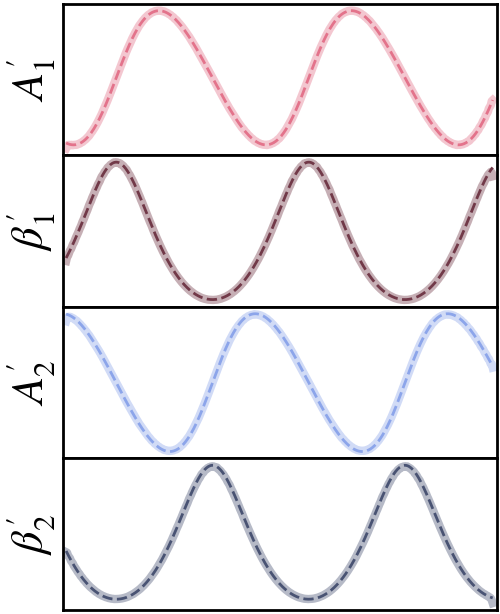

In [10]:
dt = model.t_evolutions[1] - model.t_evolutions[0]
fig,axes = plt.subplots(4,1) 
plt.subplots_adjust(hspace = 0)
for d in range(model.dims):
    for i in range(2):
        ax = axes[2*d+i]
        ax.plot(model.t_evolutions[2:-2],np.gradient(model.evolutions[i,d,:],dt,edge_order=2)[2:-2],  lw = 1.5,alpha = 0.4,color = colors[d][1+i],ls = "-",label = r"True $dA/dt$")
        ax.plot(model.t_evolutions[2:-2],np.dot(model.Phi[2:-2,i,:,d],model.Xi[d]),  lw = 0.5,alpha = 1,color = colors[d][1+i],ls = "--",label = r"Fitting $dA/dt$")
        ax.set_xlim(0,T)
        # ax.set_ylim(-0.02,0.02)
        ax.set_ylabel(r"$%s_%d'$"%(Titles[i],d+1))
        ax.set_xticks([])
        ax.set_yticks([])

plt.savefig("Fig/Example4-4.svg",dpi = 300,transparent = True,bbox_inches="tight",pad_inches = 0.02)

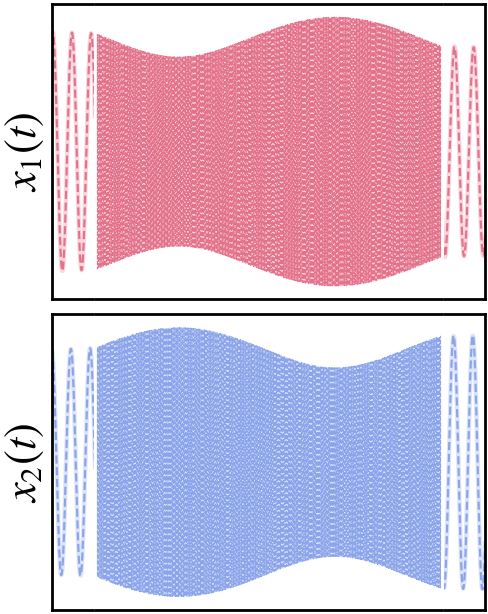

In [11]:
def WND_model(x,t):
    Phi = np.zeros(len(model.library))
    for i in range(len(model.library)):
        Phi[i] = model.library[i](x)
    dxdt = [x[1], -model.frequencys[0]**2*x[0]-np.sum(Phi*model.Xi[0]),x[3], -model.frequencys[1]**2*x[2]-np.sum(Phi*model.Xi[1])]
    return dxdt

WND_predict = odeint(WND_model, y0 = x0,t = t)
fig,axes = plt.subplots(2,1)
plt.subplots_adjust(hspace = 0.05)
for i in range(2):
    ax = axes[i]
    ax.set_xticks([])
    ax.set_yticks([])
    # ax.spines["left"].set_color("white")
    # ax.spines["right"].set_color("white")
    # ax.spines["top"].set_color("white")
    # ax.spines["bottom"].set_color("white")
    ax.set_axis_off()
    axins = inset_axes(ax, width="10%", height="100%", loc='center left',
                       bbox_to_anchor=(0, 0, 1, 1),
                       bbox_transform=ax.transAxes)
    axins.plot(t, WND_response[:,i*2],lw = 0.8,color = colors[i][0])
    axins.plot(t, WND_predict[:,i*2],lw = 0.4,color = colors[i][1],ls = '--')
    axins.set_xlim(0,10)
    axins.set_ylabel(r"$x_%d(t)$"%(i+1))
    axins.set_xticks([])
    axins.set_yticks([])
    # axins.set_ylim(-2.5,2.5)
    axins.spines["right"].set_color("white")

    axins = inset_axes(ax, width="10%", height="100%", loc='center left',
                       bbox_to_anchor=(0.9, 0, 1, 1),
                       bbox_transform=ax.transAxes)
    axins.plot(t, WND_response[:,i*2],lw = 0.8,color = colors[i][0])
    axins.plot(t, WND_predict[:,i*2],lw = 0.4,color = colors[i][1],ls = '--')
    axins.set_xlim(990,1000)
    # axins.set_ylim(-2.5,2.5)
    axins.set_xticks([])
    axins.set_yticks([])
    axins.spines["left"].set_color("white")
    axins = inset_axes(ax, width="80%", height="100%", loc='center left',
                       bbox_to_anchor=(0.1, 0, 1, 1),
                       bbox_transform=ax.transAxes)
    axins.plot(t, WND_response[:,i*2],lw = 0.2,color = colors[i][0])
    axins.plot(t, WND_predict[:,i*2],lw = 0.2,color = colors[i][1],ls = '--')
    axins.set_xlim(10,990)
    # axins.set_ylim(-2.5,2.5)
    axins.set_yticks([])
    # axins.set_xticks([250,500,750])
    axins.set_xticks([])
    axins.spines["left"].set_color("white")
    axins.spines["right"].set_color("white")
# axins.set_xlabel("Time")
# plt.legend(loc = "upper right",ncol = 1,fontsize = 5)
plt.savefig("Fig/Example4-5.svg",dpi = 300,transparent = True,bbox_inches="tight")

In [25]:
def nonweak(x,t):
    dxdt = [x[1], -model.frequencys[0]**2*x[0], x[3], -model.frequencys[1]**2*x[2]]
    return dxdt

Nonweak_predict = odeint(nonweak, y0 = x0,t = t)
error_our = WND_predict[:,0] - WND_response[:,0]
error_without = Nonweak_predict[:,0] - WND_response[:,0]
WND_derivative =  [-WND_response[:,2]*0.01-2*WND_response[:,0], -WND_response[:,0]*0.01-2*WND_response[:,2]]
pre_derivative = [-WND_response[:,2]*0.00997724-( 1.4170**2-0.00779875)*WND_response[:,0], -WND_response[:,0]*0.01008423-( 1.4170**2-0.00790304)*WND_response[:,2]]
nonweak_derivative = [-(1.7347**2-0.00929311)*WND_response[:,0], -(1.7347**2-0.00923326)*WND_response[:,2]]

In [12]:
1.4170**2-0.00779875

2.00009025

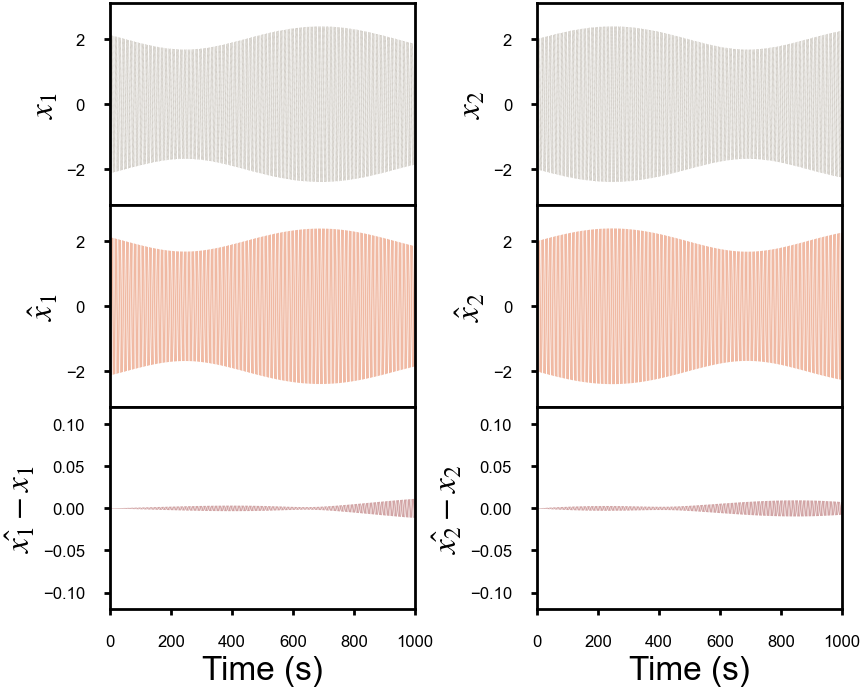

In [42]:
colors = ["#96b4c9", "#de6433", "#877c6a","#9b3738"]

# fig,ax = plt.subplots(2,2,figsize = (6/2.54,4/2.54),height_ratios=[3, 1])
# plt.subplots_adjust(wspace = 0.45,hspace = 0)
# plt.subplot(2,2,1)
# plt.plot(t, Nonweak_predict[:,0] , lw = 0.04, color = colors[0] , label = "Inferred dynamics $\hat{x}$ without weak effect")
# plt.plot(t, WND_response[:,0], lw = 0.04, color = colors[2] , ls = '--', label = "True dynamics $x$")
# # plt.legend(fontsize = 5, bbox_to_anchor = (0.5,1.25),loc = 'upper center')
# plt.xlim(0,1000)
# plt.xticks([])
# plt.ylim(-3.1,3.1)
# # plt.xlabel("Time (s)", fontsize = 7)
# plt.ylabel("$x_1$")
# plt.subplot(2,2,2)
# plt.plot(t, Nonweak_predict[:,2] , lw = 0.04, color = colors[0] , label = "Inferred dynamics $\hat{x}$ without weak effect")
# plt.plot(t, WND_response[:,2], lw = 0.04, color = colors[2] , ls = '--', label = "True dynamics $x$")
# plt.legend(fontsize = 5, bbox_to_anchor = (-0.2,1.3),loc = 'upper center')
# plt.xlim(0,1000)
# plt.xticks([])
# plt.ylim(-3.1,3.1)
# # plt.xlabel("Time (s)", fontsize = 7)
# plt.ylabel("$x_2$")
# plt.subplot(2,2,3)
# plt.plot(t, Nonweak_predict[:,0]-WND_response[:,0] , lw = 0.04, color = colors[3] , label = "Fitting error")
# plt.legend(fontsize = 5, bbox_to_anchor = (0.68,5.25),loc = 'upper center')
# plt.xlim(0,1000)
# # plt.xticks([])
# plt.ylim(-3.1,3.1)
# plt.xlabel("Time (s)", fontsize = 7)
# plt.ylabel("$\hat{x_1}-x_1$")

# plt.subplot(2,2,4)
# plt.plot(t, Nonweak_predict[:,2]-WND_response[:,2] , lw = 0.04, color = colors[3] , label = "Fitting error")

# plt.xlim(0,1000)
# # plt.xticks([])
# plt.ylim(-3.1,3.1)
# plt.xlabel("Time (s)", fontsize = 7)
# plt.ylabel("$\hat{x_2}-x_2$")
# plt.savefig("Fig/Supplementary/4-1.svg",dpi = 600,transparent = True,bbox_inches="tight")


fig,axes = plt.subplots(3,2,figsize = (6/2.54,5/2.54),height_ratios=[1, 1, 1])
for i in range(3):
    for j in range(2):
        axes[i][j].tick_params(direction='out',width = 0.5,length = 1)
plt.subplots_adjust(wspace = 0.4,hspace = 0)
plt.subplot(3,2,1)
# plt.plot(t, WND_predict[:,0] , lw = 0.04, color = colors[1] , label = "Inferred dynamics $\hat{x}$ with weak effect")
plt.plot(t, WND_response[:,0], lw = 0.04, color = colors[2] , ls = '--', label = "True dynamics $x$")
# plt.legend(fontsize = 5, bbox_to_anchor = (0.5,1.25),loc = 'upper center')
plt.xlim(0,1000)
plt.xticks([])
plt.ylim(-3.1,3.1)
# plt.xlabel("Time (s)", fontsize = 7)
plt.ylabel("$x_1$", fontsize = 6)
plt.subplot(3,2,2)
# plt.plot(t, WND_predict[:,2] , lw = 0.04, color = colors[1] , label = "Inferred dynamics $\hat{x}$ with weak effect")
plt.plot(t, WND_response[:,2], lw = 0.04, color = colors[2] , ls = '--', label = "True dynamics $x$")
# plt.legend(fontsize = 5, bbox_to_anchor = (-0.2,1.3),loc = 'upper center')
plt.xlim(0,1000)
plt.xticks([])
plt.ylim(-3.1,3.1)
# plt.xlabel("Time (s)", fontsize = 7)
plt.ylabel("$x_2$", fontsize = 6)
plt.subplot(3,2,3)
plt.plot(t, WND_predict[:,0] , lw = 0.04, color = colors[1] , label = "Inferred dynamics $\hat{x}$ with weak effect")
# plt.plot(t, WND_response[:,2], lw = 0.04, color = colors[2] , ls = '--', label = "True dynamics $x$")
# plt.legend(fontsize = 5, bbox_to_anchor = (-0.2,1.3),loc = 'upper center')
plt.xlim(0,1000)
plt.xticks([])
plt.ylim(-3.1,3.1)
# plt.xlabel("Time (s)", fontsize = 7)
plt.ylabel("$\hat{x}_1$", fontsize = 6)
plt.subplot(3,2,4)
plt.plot(t, WND_predict[:,2] , lw = 0.04, color = colors[1] , label = "Inferred dynamics $\hat{x}$ with weak effect")
# plt.plot(t, WND_response[:,2], lw = 0.04, color = colors[2] , ls = '--', label = "True dynamics $x$")
# plt.legend(fontsize = 5, bbox_to_anchor = (-0.2,1.3),loc = 'upper center')
plt.xlim(0,1000)
plt.xticks([])
plt.ylim(-3.1,3.1)
# plt.xlabel("Time (s)", fontsize = 7)
plt.ylabel("$\hat{x}_2$", fontsize = 6)
plt.subplot(3,2,5)
# plt.plot(t, WND_predict[:,2] , lw = 0.04, color = colors[1] , label = "Inferred dynamics $\hat{x}$ with weak effect")
plt.plot(t, WND_predict[:,0]-WND_response[:,0] , lw = 0.04, color = colors[3] , label = "Fitting error")
# plt.legend(fontsize = 5, bbox_to_anchor = (0.78,5.25),loc = 'upper center')
plt.xlim(0,1000)
# plt.xticks([])
plt.ylim(-0.12,0.12)
plt.xlabel("Time (s)", fontsize = 6)
plt.ylabel("$\hat{x_1}-x_1$", fontsize = 6)

plt.subplot(3,2,6)
plt.plot(t, WND_predict[:,2]-WND_response[:,2] , lw = 0.04, color = colors[3] , label = "Fitting error")

plt.xlim(0,1000)
# plt.xticks([])
plt.ylim(-0.12,0.12)
plt.xlabel("Time (s)", fontsize = 6)
plt.ylabel("$\hat{x_2}-x_2$", fontsize = 6)
plt.savefig("Fig/Supplementary/4-2.svg",dpi = 600,transparent = True,bbox_inches="tight")

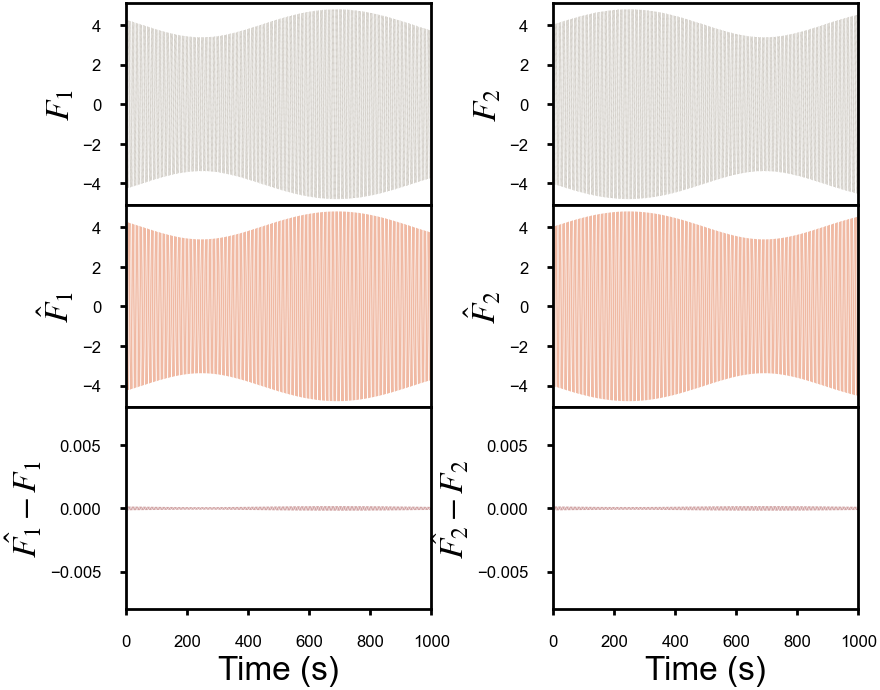

In [41]:
fig,axes = plt.subplots(3,2,figsize = (6/2.54,5/2.54),height_ratios=[1, 1, 1])
for i in range(3):
    for j in range(2):
        axes[i][j].tick_params(direction='out',width = 0.5,length = 1)
# ax[0].tick_params(direction='out',width = 0.5,length = 1)
# ax[1].tick_params(direction='out',width = 0.5,length = 1)
# ax[2].tick_params(direction='out',width = 0.5,length = 1)
plt.subplots_adjust(wspace = 0.4,hspace = 0)
plt.subplot(3,2,1)
# plt.plot(t, WND_predict[:,0] , lw = 0.04, color = colors[1] , label = "Inferred dynamics $\hat{x}$ with weak effect")
plt.plot(t, WND_derivative[0], lw = 0.04, color = colors[2] , ls = '--', label = "True dynamics $x$")
# plt.legend(fontsize = 5, bbox_to_anchor = (0.5,1.25),loc = 'upper center')
plt.xlim(0,1000)
plt.xticks([])
plt.ylim(-5.1,5.1)
# plt.xlabel("Time (s)", fontsize = 7)
plt.ylabel("$F_1$", fontsize = 6)
plt.subplot(3,2,2)
# plt.plot(t, WND_predict[:,2] , lw = 0.04, color = colors[1] , label = "Inferred dynamics $\hat{x}$ with weak effect")
plt.plot(t,WND_derivative[1], lw = 0.04, color = colors[2] , ls = '--', label = "True dynamics $x$")
# plt.legend(fontsize = 5, bbox_to_anchor = (-0.2,1.3),loc = 'upper center')
plt.xlim(0,1000)
plt.xticks([])
plt.ylim(-5.1,5.1)
# plt.xlabel("Time (s)", fontsize = 7)
plt.ylabel("$F_2$", fontsize = 6)
plt.subplot(3,2,3)
plt.plot(t, pre_derivative[0] , lw = 0.04, color = colors[1] , label = "Inferred dynamics $\hat{x}$ with weak effect")
# plt.plot(t, WND_response[:,2], lw = 0.04, color = colors[2] , ls = '--', label = "True dynamics $x$")
# plt.legend(fontsize = 5, bbox_to_anchor = (-0.2,1.3),loc = 'upper center')
plt.xlim(0,1000)
plt.xticks([])
plt.ylim(-5.1,5.1)
# plt.xlabel("Time (s)", fontsize = 7)
plt.ylabel("$\hat{F}_1$", fontsize = 6)
plt.subplot(3,2,4)
plt.plot(t, pre_derivative[1] , lw = 0.04, color = colors[1] , label = "Inferred dynamics $\hat{x}$ with weak effect")
# plt.plot(t, WND_response[:,2], lw = 0.04, color = colors[2] , ls = '--', label = "True dynamics $x$")
# plt.legend(fontsize = 5, bbox_to_anchor = (-0.2,1.3),loc = 'upper center')
plt.xlim(0,1000)
plt.xticks([])
plt.ylim(-5.1,5.1)
# plt.xlabel("Time (s)", fontsize = 7)
plt.ylabel("$\hat{F}_2$", fontsize = 6)
plt.subplot(3,2,5)
# plt.plot(t, WND_predict[:,2] , lw = 0.04, color = colors[1] , label = "Inferred dynamics $\hat{x}$ with weak effect")
plt.plot(t, pre_derivative[0]-WND_derivative[0] , lw = 0.04, color = colors[3] , label = "Fitting error")
# plt.legend(fontsize = 5, bbox_to_anchor = (0.78,5.25),loc = 'upper center')
plt.xlim(0,1000)
# plt.xticks([])
plt.ylim(-0.008,0.008)
plt.xlabel("Time (s)", fontsize = 6)
plt.ylabel("$\hat{F_1}-F_1$", fontsize = 6)

plt.subplot(3,2,6)
plt.plot(t, pre_derivative[1]-WND_derivative[1] , lw = 0.04, color = colors[3] , label = "Fitting error")

plt.xlim(0,1000)
# plt.xticks([])
plt.ylim(-0.008,0.008)
plt.xlabel("Time (s)", fontsize = 6)
plt.ylabel("$\hat{F_2}-F_2$", fontsize = 6)
plt.savefig("Fig/Supplementary/4-4.svg",dpi = 600,transparent = True,bbox_inches="tight")

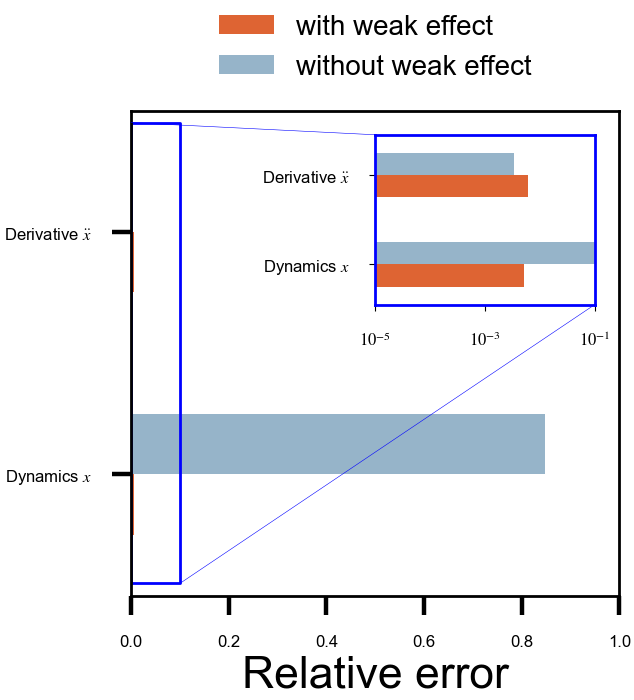

In [18]:
fig,ax = plt.subplots(figsize = (4/2.54,4/2.54))
DyE_with = (np.linalg.norm(WND_response[:,0] - WND_predict[:,0])/np.linalg.norm(WND_response[:,0])+np.linalg.norm(WND_response[:,2] - WND_predict[:,2])/np.linalg.norm(WND_response[:,2]))/2
DyE_without = (np.linalg.norm(WND_response[:,0] - Nonweak_predict[:,0])/np.linalg.norm(WND_response[:,0]) + np.linalg.norm(WND_response[:,2] - Nonweak_predict[:,2])/np.linalg.norm(WND_response[:,2]))/2
# WND_derivative =  +WND_response[:,1]*0.01-2*WND_response[:,0]-0.02*WND_response[:,1]*WND_response[:,0]**2
# pre_derivative = -1.999823*WND_response[:,0] - 1.003713e-2*WND_response[:,1]
# nonweak_derivative = -1.999823*WND_response[:,0]
DeE_with = (np.linalg.norm(WND_derivative[0] - pre_derivative[0])/np.linalg.norm(WND_derivative[0]) + np.linalg.norm(WND_derivative[1] - pre_derivative[1])/np.linalg.norm(WND_derivative[1]))/2
DeE_without = (np.linalg.norm(WND_derivative[0] - nonweak_derivative[0])/np.linalg.norm(WND_derivative[0]) + np.linalg.norm(WND_derivative[1] - nonweak_derivative[1])/np.linalg.norm(WND_derivative[1]))/2
ax.barh(0.75, DyE_with, color = colors[1], height = 0.5, label = "with weak effect")
ax.barh(1.25, DyE_without, color = colors[0], height = 0.5, label = 'without weak effect')
ax.barh(2.75, DeE_with, color = colors[1],height = 0.5)
ax.barh(3.25, DeE_without, color = colors[0] ,height = 0.5)
# ax.set_yscale('log')
ax.set_yticks([1,3])
ax.set_xlim(0,1)
ax.set_ylim(0,4)
ax.set_yticklabels(["Dynamics $x$", "Derivative $\ddot{x}$"])
ax.set_xlabel("Relative error")
from matplotlib.patches import ConnectionPatch
tx0 = 1e-5
tx1 = 1e-1
ty0 = 0.1
ty1 = 3.9
sx = [tx0,tx1,tx1,tx0,tx0]
sy = [ty0,ty0,ty1,ty1,ty0]
ax.plot(sx,sy,"blue" ,lw = 0.5, ls = '-')


axins = ax.inset_axes((0.5, 0.6, 0.45, 0.35))
axins.spines['bottom'].set_color('blue') 
axins.spines['top'].set_color('blue')
axins.spines['left'].set_color('blue') 
axins.spines['right'].set_color('blue')
axins.barh(0.75, DyE_with, color = colors[1], height = 0.5, label = "with weak effect")
axins.barh(1.25, DyE_without, color = colors[0], height = 0.5, label = 'without weak effect')
axins.barh(2.75, DeE_with, color = colors[1],height = 0.5)

axins.barh(3.25, DeE_without, color = colors[0] ,height = 0.5)
axins.set_xlim(tx0,tx1)
# axins.set_yticks(fontsize = 3)
axins.set_xscale('log')
axins.set_yticks([1,3])
axins.set_xticks([1e-1,1e-3,1e-5])
axins.tick_params(which = "major", length = 1,width = 0.2)
axins.set_xticklabels(['$10^{-1}$','$10^{-3}$','$10^{-5}$'],fontsize = 3)
axins.set_ylim(ty0,ty1)
axins.set_yticklabels(["Dynamics $x$", "Derivative $\ddot{x}$"],fontsize = 3)

xy = (tx0,ty1)
xy2 = (tx0,ty1)
con = ConnectionPatch(xyA=xy2,xyB=xy,coordsA="data",coordsB="data",
        axesA=axins,axesB=ax, lw = 0.1 , color = 'blue')
axins.add_artist(con)
xy = (tx1,ty0)
xy2 = (tx1,ty0)

con = ConnectionPatch(xyA=xy2,xyB=xy,coordsA="data",coordsB="data",
        axesA=axins,axesB=ax, lw = 0.1 , color = 'blue')
axins.add_artist(con)


plt.legend(fontsize = 5, bbox_to_anchor = (0.5,1.25),loc = 'upper center')
plt.savefig("Fig/Supplementary/4-5.svg",dpi = 1200,transparent = True,bbox_inches="tight")
# plt.savefig("Fig/Supplementary/5.svg",dpi = 1200,transparent = True,bbox_inches="tight")

In [ ]:
1.4170